<a href="https://colab.research.google.com/github/Aman7Rathore/Credit_card_default_predictio-/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/capstone_project-3/default of credit card clients.csv",index_col=0)

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df = df.iloc[1:,:]

In [7]:
df.drop(['X2','X3','X4'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X5      30000 non-null  object
 2   X6      30000 non-null  object
 3   X7      30000 non-null  object
 4   X8      30000 non-null  object
 5   X9      30000 non-null  object
 6   X10     30000 non-null  object
 7   X11     30000 non-null  object
 8   X12     30000 non-null  object
 9   X13     30000 non-null  object
 10  X14     30000 non-null  object
 11  X15     30000 non-null  object
 12  X16     30000 non-null  object
 13  X17     30000 non-null  object
 14  X18     30000 non-null  object
 15  X19     30000 non-null  object
 16  X20     30000 non-null  object
 17  X21     30000 non-null  object
 18  X22     30000 non-null  object
 19  X23     30000 non-null  object
 20  Y       30000 non-null  object
dtypes: object(21)
memory usage: 5.0+ MB


In [9]:
df.isnull().sum()

X1     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**SINCE WE HAVE NO NULL VALUES IN THE DATASET WE WILL DIRECTLY CONVERT THE DATATYPE TO 'int' AND MOVE FORWARD**

In [10]:
df = df.astype(str).astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X5      30000 non-null  int64
 2   X6      30000 non-null  int64
 3   X7      30000 non-null  int64
 4   X8      30000 non-null  int64
 5   X9      30000 non-null  int64
 6   X10     30000 non-null  int64
 7   X11     30000 non-null  int64
 8   X12     30000 non-null  int64
 9   X13     30000 non-null  int64
 10  X14     30000 non-null  int64
 11  X15     30000 non-null  int64
 12  X16     30000 non-null  int64
 13  X17     30000 non-null  int64
 14  X18     30000 non-null  int64
 15  X19     30000 non-null  int64
 16  X20     30000 non-null  int64
 17  X21     30000 non-null  int64
 18  X22     30000 non-null  int64
 19  X23     30000 non-null  int64
 20  Y       30000 non-null  int64
dtypes: int64(21)
memory usage: 5.0+ MB


In [12]:
df.shape

(30000, 21)

**Now we will Perform EDA**


In [11]:
pip install dataprep

     |████████████████████████████████| 9.5 MB 26.1 MB/s 
     |████████████████████████████████| 366 kB 62.9 MB/s 
     |████████████████████████████████| 1.1 MB 44.4 MB/s 
     |████████████████████████████████| 133 kB 53.8 MB/s 
     |████████████████████████████████| 78 kB 6.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 943 kB 42.1 MB/s 
     |████████████████████████████████| 965 kB 45.1 MB/s 
     |████████████████████████████████| 1.0 MB 20.1 MB/s 
     |████████████████████████████████| 749 kB 44.0 MB/s 
     |████████████████████████████████| 95 kB 4.1 MB/s 
     |████████████████████████████████| 10.9 MB 59.0 MB/s 
     |████████████████████████████████| 1.5 MB 53.3 MB/s 
     |████████████████████████████████| 271 kB 69.6 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |█████

In [12]:
from dataprep.eda import create_report

DataPrep Report
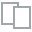
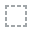
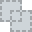
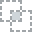
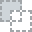
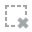
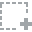
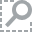
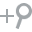
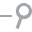
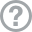
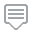
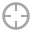
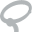
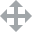
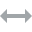
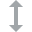
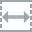
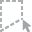
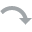
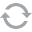
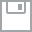
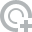
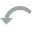
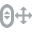
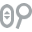
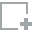
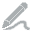
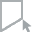
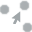
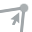
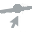

In [13]:
create_report(df)

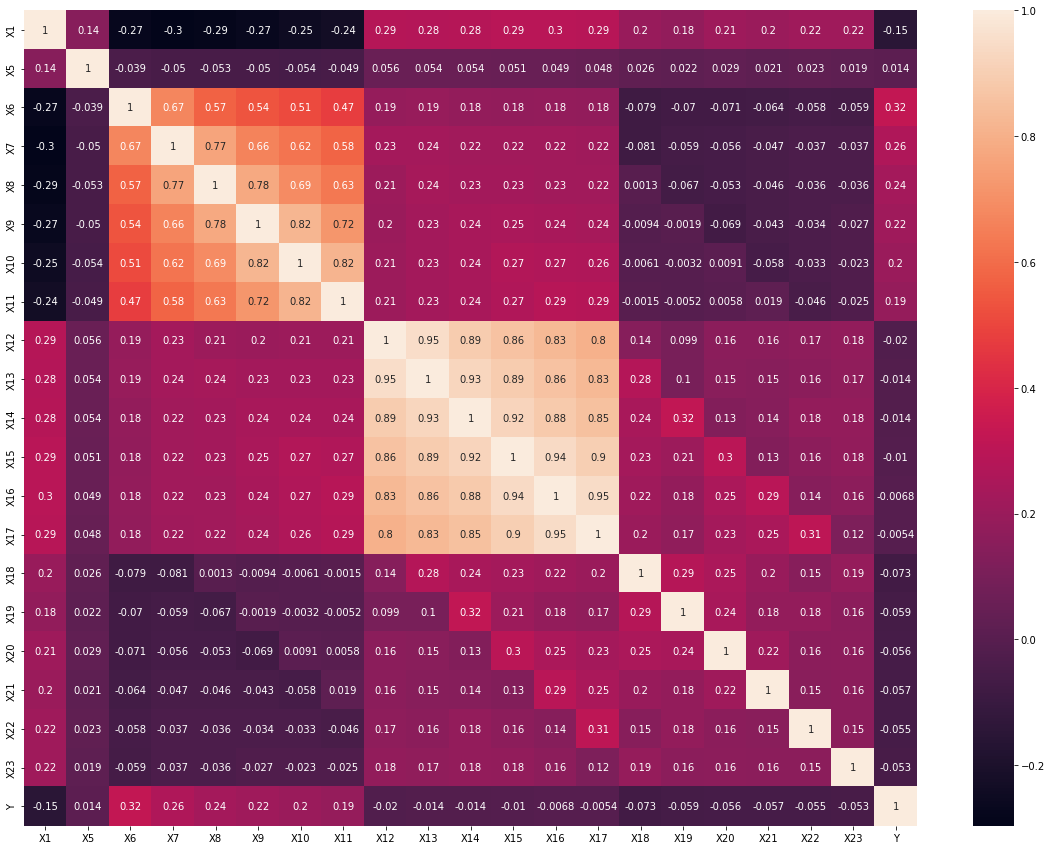

In [13]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

In [90]:
y = df['Y']

In [91]:
x = df.drop('Y',axis=1)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [93]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit_transform(X_train,Y_train)

array([[1.01010101e-01, 7.40740741e-02, 2.00000000e-01, ...,
        6.12217502e-03, 7.42505199e-03, 6.05675417e-03],
       [4.04040404e-02, 3.88888889e-01, 2.00000000e-01, ...,
        5.67218192e-03, 1.05502791e-02, 3.78310691e-03],
       [1.51515152e-01, 2.77777778e-01, 2.00000000e-01, ...,
        2.40122368e-04, 2.34802323e-02, 1.30517189e-04],
       ...,
       [1.91919192e-01, 5.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41414141e-01, 3.33333333e-01, 3.00000000e-01, ...,
        3.23125297e-03, 0.00000000e+00, 1.89155346e-03],
       [1.51515152e-01, 5.55555556e-01, 2.00000000e-01, ...,
        4.72681827e-03, 0.00000000e+00, 0.00000000e+00]])

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train,Y_train)

array([[-0.44484858, -1.13792618,  0.01644909, ..., -0.10472246,
        -0.10444245, -0.11236323],
       [-0.90644952,  0.70854108,  0.01644909, ..., -0.12015162,
        -0.01752952, -0.17870213],
       [-0.06018112,  0.05684675,  0.01644909, ..., -0.3064036 ,
         0.34205399, -0.28527486],
       ...,
       [ 0.24755284,  1.36023541, -1.7578347 , ..., -0.31463681,
        -0.31093401, -0.289083  ],
       [-0.13711461,  0.38269392,  0.90359099, ..., -0.20384508,
        -0.31093401, -0.23389257],
       [-0.06018112,  1.68608257,  0.01644909, ..., -0.15256582,
        -0.31093401, -0.289083  ]])

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [97]:
y_pre = lr.predict(X_test)

In [98]:
y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
Y_test

5084     0
4150     0
4366     0
11616    1
29107    0
        ..
25414    1
21723    0
10130    0
6830     1
10049    0
Name: Y, Length: 6000, dtype: int64

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pre,Y_test)

array([[4678, 1322],
       [   0,    0]])

In [101]:
lr.score(X_test,Y_test)

0.7796666666666666

In [102]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [103]:
Y__pre = svc.predict(X_test)

In [104]:
confusion_matrix(Y__pre,Y_test)

array([[4678, 1322],
       [   0,    0]])

In [105]:
svc.score(X_test,Y_test)

0.7796666666666666

In [106]:
import xgboost

In [119]:
from xgboost import XGBClassifier
model_1 = XGBClassifier(n_estimators=1000, max_depth=7)
model_1.fit(X_train,Y_train)


XGBClassifier(max_depth=7, n_estimators=1000)

In [120]:
y_predict = model_1.predict(X_test)

In [121]:
model_1.score(X_test,Y_test)

0.8088333333333333

In [122]:
confusion_matrix(y_predict,Y_test)

array([[4368,  837],
       [ 310,  485]])